### INSPECT H5 FILE CONTENTS

The following code is used to inspect the contents of the H5 file. Checkout the hierarchical organization of the mdcath dataset from: [mdCATH: A Large-Scale MD Dataset for Data-Driven
Computational Biophysics](https://arxiv.org/pdf/2407.14794v1)

| Field                      | Size           | Type    | Unit         | Description                                           |
|----------------------------|----------------|---------|--------------|-------------------------------------------------------|
| **Domain ID**/             |                |         |              |                                                       |
| &nbsp;&nbsp;&nbsp;&nbsp;  `chain`              | N              | string  |              | Chain ID                                              |
| &nbsp;&nbsp;&nbsp;&nbsp; `element`            | N              | string  |              | Chemical element                                      |
| &nbsp;&nbsp;&nbsp;&nbsp; `pdb`                | 1              | string  |              | PDB file used for simulation                          |
| &nbsp;&nbsp;&nbsp;&nbsp; `psf`                | 1              | string  |              | Topology file used for simulation                     |
| &nbsp;&nbsp;&nbsp;&nbsp; `pdbProteinAtoms`    | 1              | string  |              | PDB file with the N reported atoms                    |
| &nbsp;&nbsp;&nbsp;&nbsp; `resid`              | N              | integer |              | Residue number                                        |
| &nbsp;&nbsp;&nbsp;&nbsp; `resname`            | N              | string  |              | Residue name                                          |
| &nbsp;&nbsp;&nbsp;&nbsp; `z`                  | N              | integer |              | Atomic number                                         |
| &nbsp;&nbsp;&nbsp;&nbsp; `.numResidues`       | 1              | integer |              | Number of residues (attribute)                        |
| &nbsp;&nbsp;&nbsp;&nbsp;**320/**                   |                |         |              | Group for the 320 K simulations                       |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `0/`           |                |         |              | Data of the first replica                             |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `coords` | F × N × 3      | float   | Å            | Atom coordinates                                      |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `forces` | F × N × 3      | float   | kcal/mol/Å   | Forces                                                |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `dssp`   | F × R          | string  |              | DSSP secondary structure assignments                  |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `gyrationRadius` | F      | double | nm           | Gyration radius                                       |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `rmsd`   | F              | float   | nm           | Root-mean square deviation w.r.t. begin               |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `rmsf`   | R              | float   | nm           | Cα root-mean-square fluctuation                       |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `box`    | 3 × 3          | float   | nm           | Simulation unit cell                                  |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `.numFrames` | 1          | integer |             | Number of frames for this replica (attribute)         |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; `1/`           |                |         |              | Second replica                                        |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; ...      |                |         |              |                                                       |
| &nbsp;&nbsp;&nbsp;&nbsp;**348/**                   |                |         |              |                                                       |
| &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;...            |                |         |              |                                                       |

*Hierarchical organization of the data fields in the mdCATH dataset, with units and description. The following groups and fields are provided in an HDF5 file for each simulated CATH domain. Key: N, number of atoms; R, number of residues; F, trajectory length in frames (1 frame corresponds to 1 ns of simulated time).*


In [1]:
import os
import matplotlib 
import h5py as h5
import numpy as np
import pandas as pd
from glob import glob
from os.path import join as opj
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Specify the case of interest
domain_id = '1r9lA02'
temperature = '379'
repl = '0'

In [3]:
# Load the h5 file
data_dir = 'data'
f = h5.File(opj(data_dir, f"mdcath_dataset_{domain_id}.h5"), 'r')
print('Successfully loaded the h5 file')
print(f'dom: {list(f.keys())[0]}')
print(f'layout: {f.attrs["layout"]}')

Successfully loaded the h5 file
dom: 1r9lA02
layout: mdcath-only-protein-v1.0


In [4]:
print(f'molDatasets --> {list(f[domain_id].keys())}')
print(f'molAttrs --> {list(f[domain_id].attrs.keys())}')

molDatasets --> ['320', '348', '379', '413', '450', 'chain', 'element', 'pdb', 'pdbProteinAtoms', 'psf', 'resid', 'resname', 'z']
molAttrs --> ['numChains', 'numProteinAtoms', 'numResidues']


In [5]:
print(domain_id)
print(f"numChains --> {f[domain_id].attrs['numChains']}")
print(f"numProteinAtoms --> {f[domain_id].attrs['numProteinAtoms']}")
print(f"numResidues --> {f[domain_id].attrs['numResidues']}")

1r9lA02
numChains --> 1
numProteinAtoms --> 2165
numResidues --> 141


In [6]:
print(f"z.shape --> {f[domain_id]['z'].shape}")
print(f"z --> {f[domain_id]['z'][:10]}")

z.shape --> (2165,)
z --> [6 1 1 1 6 8 7 1 6 1]


In [7]:
# Get CA idxs from the protein pdb file contained in the h5 file
pdbProteinAtoms = f[domain_id]['pdbProteinAtoms'][()].decode('utf-8').split('\n')[1:-3] # remove header and footer
atomtypes = [line.split()[2] for line in pdbProteinAtoms]
ca_indices = np.where(np.array(atomtypes) == 'CA')[0]
print(f'Number of CA atoms: {len(ca_indices)}')

Number of CA atoms: 141


#### ACCESS PDB AND PSF FILES

In [8]:
print(f"pdbProteinAtoms\n\n{f[domain_id]['pdbProteinAtoms'][()].decode('utf-8')}")

pdbProteinAtoms

MODEL        1
ATOM      1  CAY ALA 0  92      -3.090  -3.392 -18.053  0.00  0.00      P0   C  
ATOM      2  HY1 ALA 0  92      -3.921  -3.067 -18.503  0.00  0.00      P0   H  
ATOM      3  HY2 ALA 0  92      -3.233  -4.316 -17.698  0.00  0.00      P0   H  
ATOM      4  HY3 ALA 0  92      -2.328  -3.389 -18.700  0.00  0.00      P0   H  
ATOM      5  CY  ALA 0  92      -2.873  -2.781 -17.291  0.00  0.00      P0   C  
ATOM      6  OY  ALA 0  92      -2.041  -3.106 -16.840  0.00  0.00      P0   O  
ATOM      7  N   ALA 0  92      -3.563  -2.059 -17.246  1.00  0.00      P0   N  
ATOM      8  HN  ALA 0  92      -4.395  -1.734 -17.697  0.00  0.00      P0   H  
ATOM      9  CA  ALA 0  92      -3.248  -1.173 -16.141  1.00  0.00      P0   C  
ATOM     10  HA  ALA 0  92      -2.335  -0.801 -16.267  1.00  0.00      P0   H  
ATOM     11  CB  ALA 0  92      -4.235  -0.026 -16.068  1.00  0.00      P0   C  
ATOM     12  HB1 ALA 0  92      -4.243   0.355 -15.142  1.00  0.00      P0   

In [9]:
print(f"PDB\n\n{f[domain_id]['pdb'][()].decode('utf-8')}")

PDB

MODEL        1
ATOM      1  CAY ALA 0  92      -3.090  -3.392 -18.053  0.00  0.00      P0   C  
ATOM      2  HY1 ALA 0  92      -3.921  -3.067 -18.503  0.00  0.00      P0   H  
ATOM      3  HY2 ALA 0  92      -3.233  -4.316 -17.698  0.00  0.00      P0   H  
ATOM      4  HY3 ALA 0  92      -2.328  -3.389 -18.700  0.00  0.00      P0   H  
ATOM      5  CY  ALA 0  92      -2.873  -2.781 -17.291  0.00  0.00      P0   C  
ATOM      6  OY  ALA 0  92      -2.041  -3.106 -16.840  0.00  0.00      P0   O  
ATOM      7  N   ALA 0  92      -3.563  -2.059 -17.246  1.00  0.00      P0   N  
ATOM      8  HN  ALA 0  92      -4.395  -1.734 -17.697  0.00  0.00      P0   H  
ATOM      9  CA  ALA 0  92      -3.248  -1.173 -16.141  1.00  0.00      P0   C  
ATOM     10  HA  ALA 0  92      -2.335  -0.801 -16.267  1.00  0.00      P0   H  
ATOM     11  CB  ALA 0  92      -4.235  -0.026 -16.068  1.00  0.00      P0   C  
ATOM     12  HB1 ALA 0  92      -4.243   0.355 -15.142  1.00  0.00      P0   H  
ATOM    

In [10]:
print(f"PSF\n\n{f[domain_id]['psf'][()].decode('utf-8')}")

PSF

PSF CMAP

      12 !NTITLE
 REMARKS original generated structure x-plor psf file
 REMARKS 3 patches were applied to the molecule.
 REMARKS topology topologies/0.top_all22star_prot.rtf 
 REMARKS topology topologies/1.top_water_ions.rtf 
 REMARKS topology topologies/2.top_all36_prot_arg0.rtf 
 REMARKS topology topologies/3.top_ions_won.rtf 
 REMARKS segment P0 { first ACE; last CT3; auto angles dihedrals }
 REMARKS segment WT0 { first NONE; last NONE; auto none  }
 REMARKS segment I { first NONE; last NONE; auto angles dihedrals }
 REMARKS patch CT3 P0:232  
 REMARKS patch ACE P0:92  
 REMARKS patch DISU P0:136  P0:142  

   20996 !NATOM
       1 P0   92   ALA  CAY  CT3   -0.270000       12.0110           0
       2 P0   92   ALA  HY1  HA     0.090000        1.0080           0
       3 P0   92   ALA  HY2  HA     0.090000        1.0080           0
       4 P0   92   ALA  HY3  HA     0.090000        1.0080           0
       5 P0   92   ALA  CY   C      0.510000       12.0110         

#### ACCESS TRAJECTORY DATA

In [11]:
print(f'available replicas ({temperature}K) --> {list(f[domain_id][temperature].keys())}')
print(f'attrs ({temperature}K) --> {list(f[domain_id][temperature].attrs.keys())}')

available replicas (379K) --> ['0', '1', '2', '3', '4']
attrs (379K) --> []


In [12]:
for key, data in f[domain_id][temperature][str(repl)].items():
    print(f'prop {key} --> {data.shape}')
    for attr in data.attrs.keys():
        print(f'{attr} --> {data.attrs[attr]}')
    print('')

prop box --> (3, 3)

prop coords --> (440, 2165, 3)
unit --> Angstrom

prop dssp --> (440, 141)
unit --> nm

prop forces --> (440, 2165, 3)
unit --> kcal/mol/Angstrom

prop gyrationRadius --> (440,)
unit --> nm

prop rmsd --> (440,)
unit --> nm

prop rmsf --> (141,)



In [13]:
# Each replica contains the number of frames (numFrames) as attributes
for replattr in f[domain_id][temperature][str(repl)].attrs.keys():
    print(f'{replattr} --> {f[domain_id][temperature][str(repl)].attrs[replattr]}')

numFrames --> 440


In [14]:
# Get the number of frames for each replica
for sims_name in ["320", "348", "379", "413", "450"]:
    for repln in range(5):
        print(f"{sims_name} Replica {repln} --> {f[domain_id][sims_name][str(repln)].attrs['numFrames']}")

320 Replica 0 --> 450
320 Replica 1 --> 450
320 Replica 2 --> 430
320 Replica 3 --> 450
320 Replica 4 --> 440
348 Replica 0 --> 440
348 Replica 1 --> 440
348 Replica 2 --> 450
348 Replica 3 --> 450
348 Replica 4 --> 440
379 Replica 0 --> 440
379 Replica 1 --> 440
379 Replica 2 --> 440
379 Replica 3 --> 450
379 Replica 4 --> 450
413 Replica 0 --> 450
413 Replica 1 --> 440
413 Replica 2 --> 440
413 Replica 3 --> 440
413 Replica 4 --> 440
450 Replica 0 --> 450
450 Replica 1 --> 450
450 Replica 2 --> 450
450 Replica 3 --> 440
450 Replica 4 --> 450


#### VISUALIZE TRAJECTORY DATA ANALYSIS

In [15]:
rmsd = f[domain_id][temperature][str(repl)]['rmsd'][:] # shape (numFrames,)
rmsf = f[domain_id][temperature][str(repl)]['rmsf'][:] # shape (numResidues)
gyration_radius = f[domain_id][temperature][str(repl)]['gyrationRadius'][:] # shape (numFrames,)

print(f"rmsd.shape --> {rmsd.shape}")
print(f"rmsf.shape --> {rmsf.shape}")
print(f"gyration_radius.shape --> {gyration_radius.shape}")

rmsd.shape --> (440,)
rmsf.shape --> (141,)
gyration_radius.shape --> (440,)


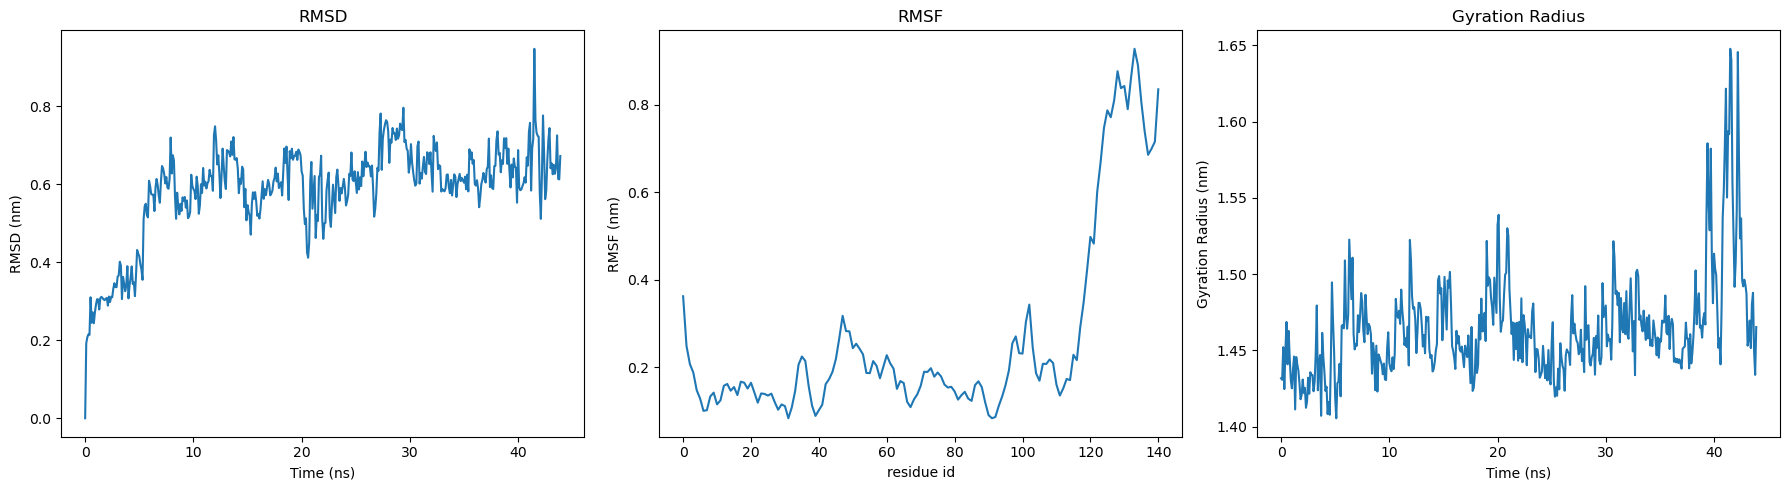

In [16]:
# plot rmsd, rmsf, gyration radius

time = np.arange(0, len(rmsd))/10 # time in ns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()
last_frame =  rmsd.shape[0]
##
axs[0].plot(time[:last_frame], rmsd[:last_frame])
axs[0].set_title('RMSD')
axs[0].set_ylabel('RMSD (nm)')
axs[0].set_xlabel('Time (ns)')
##
axs[1].plot(rmsf)
axs[1].set_title('RMSF')
axs[1].set_ylabel('RMSF (nm)')
axs[1].set_xlabel('residue id')
## 
axs[2].plot(time, gyration_radius)
axs[2].set_title('Gyration Radius')
axs[2].set_ylabel('Gyration Radius (nm)')
axs[2].set_xlabel('Time (ns)')

plt.tight_layout()
plt.show()

In [17]:
# DSSP 
simplified = False # if True, the DSSP is simplified to 3 states (H, E, C) 
encoded_dssp = f[domain_id][temperature][str(repl)]['dssp'] # shape (numFrames, numResidues)
print(f"encoded_dssp.shape --> {encoded_dssp.shape}")

encoded_dssp.shape --> (440, 141)


In [18]:
floatMap = {'C': 0, 'E': 1, 'H': 2} if simplified else {"H": 0, "B": 1, "E": 2, "G": 3, "I": 4, "T": 5, "S": 6, " ": 7}
dssp_decoded_float = np.zeros((encoded_dssp.shape[0], encoded_dssp.shape[1]), dtype=np.float32)
for i in range(encoded_dssp.shape[0]):
    dssp_decoded_float[i] = [floatMap[el.decode()] for el in encoded_dssp[i]]
print(f"dssp_decoded.shape --> {dssp_decoded_float.shape}")

dssp_decoded.shape --> (440, 141)


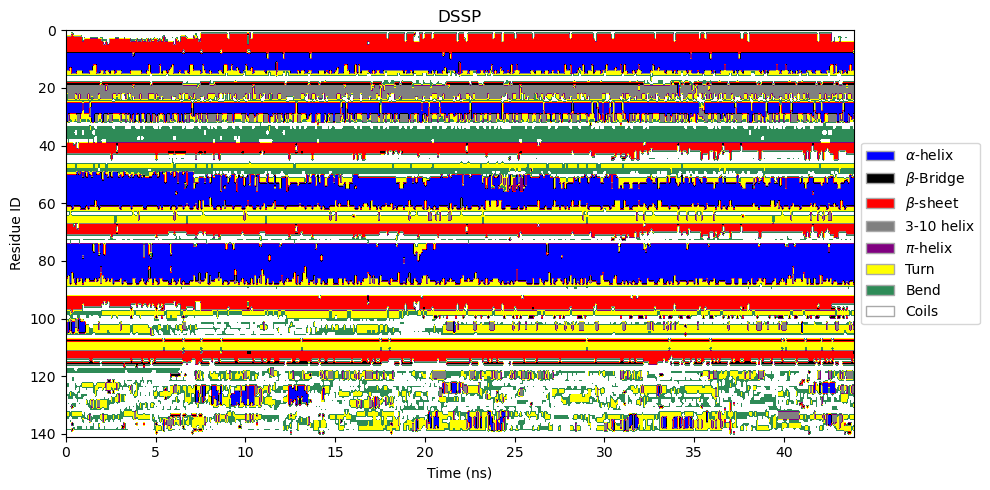

In [19]:
color_list = ["blue", "black", "red", "grey", "purple", "yellow", "seagreen", "white"]
cmap = matplotlib.colors.ListedColormap(color_list)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
xtime = np.arange(0, len(dssp_decoded_float)) / 10
x_min, x_max = xtime[0], xtime[-1]
extent = [x_min, x_max, len(dssp_decoded_float.T), 0]

cax = ax.imshow(dssp_decoded_float.T, aspect='auto', cmap=cmap, extent=extent)
labels = ["$\\alpha$-helix", "$\\beta$-Bridge", "$\\beta$-sheet", "3-10 helix", "$\\pi$-helix", "Turn", "Bend", "Coils"]
handles = [mpatches.Patch(facecolor=color_list[i], label=labels[i], edgecolor="darkgrey") for i in range(len(color_list))]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('DSSP')   
plt.xlabel('Time (ns)')
plt.ylabel('Residue ID')
plt.tight_layout()
plt.show()

#### COORDINATES AND FORCES

In [20]:
coords = f[domain_id][temperature][str(1)]["coords"]#[:,ca_indices,:]
forces = f[domain_id][temperature][str(1)]["forces"]#[:,ca_indices,:]
print(f'coords --> {coords.shape}, units: {f[domain_id][temperature]["0"]["coords"].attrs["unit"]}')
print(f'forces --> {forces.shape}, units: {f[domain_id][temperature]["0"]["forces"].attrs["unit"]}')

coords --> (440, 2165, 3), units: Angstrom
forces --> (440, 2165, 3), units: kcal/mol/Angstrom


In [21]:
def plot_box(box, ax, origin=[0, 0, 0]):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
    
    # Compute original vertices centered at the origin
    vertices = np.array([[-box[0][0]/2, -box[1][1]/2, -box[2][2]/2],
                        [box[0][0]/2, -box[1][1]/2, -box[2][2]/2],
                        [-box[0][0]/2, box[1][1]/2, -box[2][2]/2],
                        [box[0][0]/2, box[1][1]/2, -box[2][2]/2],
                        [-box[0][0]/2, -box[1][1]/2, box[2][2]/2],
                        [box[0][0]/2, -box[1][1]/2, box[2][2]/2],
                        [-box[0][0]/2, box[1][1]/2, box[2][2]/2],
                        [box[0][0]/2, box[1][1]/2, box[2][2]/2]])

    # Translate vertices to make the box center at 'origin'
    vertices = vertices + origin

    # List of sides' vertices indices
    edges = [
        [vertices[0], vertices[1], vertices[3], vertices[2]],  # Bottom face
        [vertices[4], vertices[5], vertices[7], vertices[6]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[0], vertices[2], vertices[6], vertices[4]],  # Left face
        [vertices[1], vertices[3], vertices[7], vertices[5]]   # Right face
    ]

    # Create a 3D polygon collection for the faces
    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k', alpha=0.1)
    ax.add_collection3d(faces)

    # Plot the vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=5, color='r')

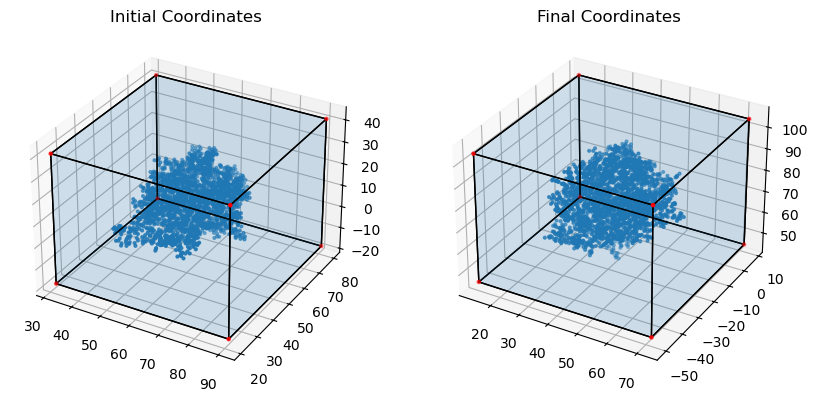

In [22]:
# Plot initial and final coordinates inside the box
box = f[domain_id][temperature][str(repl)]["box"][:] * 10 # nm -> A

fig = plt.figure(figsize=(10, 5))

# initial conformation
init_coords = coords[0]
init_coords_barycenter = np.mean(init_coords, axis=0)
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Initial Coordinates')
ax.scatter(init_coords[:,0], init_coords[:,1], init_coords[:,2], s=4)
plot_box(box, ax, init_coords_barycenter)

# final conformation
end_coords = coords[-1]
end_coords_barycenter = np.mean(end_coords, axis=0)
ax1 = fig.add_subplot(122, projection='3d')
ax1.set_title('Final Coordinates')
ax1.scatter(end_coords[:,0], end_coords[:,1], end_coords[:,2], s=4)
plot_box(box, ax1, end_coords_barycenter)

plt.show()

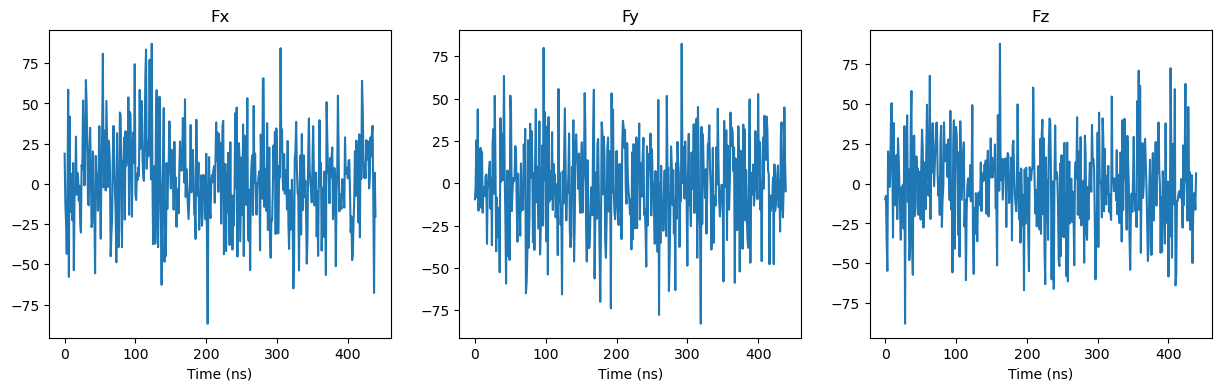

In [23]:
# Plot forces component for a given atom along time
atom_id = 50
fig = plt.figure(figsize=(15, 4))
comps = ['x', 'y', 'z']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(f'F{comps[i]}')
    plt.plot(forces[:, atom_id, i])
    plt.xlabel('Time (ns)')
plt.show()

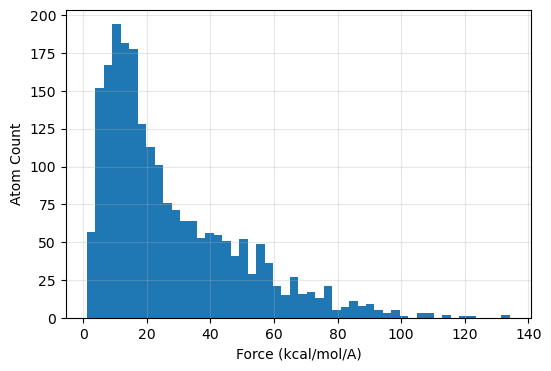

In [24]:
# histogram of forces for a given frame
frame_i = 3
plt.figure(figsize=(6,4))
normForces = np.linalg.norm(forces[frame_i], axis=1)
plt.hist(normForces, bins=50)
plt.ylabel("Atom Count")
plt.xlabel("Force (kcal/mol/A)")
plt.grid(alpha=0.3)
plt.show()